# NCRM April 2024 - Intro to Python for Data Analysis
### Session 7: Introduction to data visualisation with Python

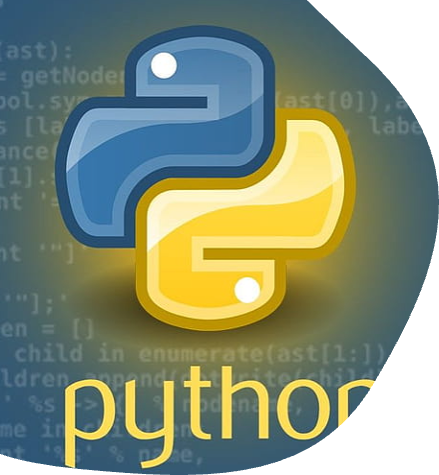

## Lewys Brace
#### l.brace@exeter.ac.uk

## matplotlib

Before creating any plots, it is first worth spending sometime familiarising ourselves with the matplotlib module.

### Some history

Matplotlib was originally developed by a neurobiologist in order to emulate aspects of the MATLAB software.

The pythonic concept of importing is not utilised by MATLAB, and this is why something called Pylab exists.

Pylab is a module within the Matplotlib library that was built to mimic the MATLAB style. It only exists in order to bring aspects of NumPy and Matplotlib into the namespace, thus making for an easier transition for ex-MATLAB users, because they only had to do one import in order to access the necessary functions:

> from pylab import *

However, using the above command is now considered bad practice, and Matplotlib actually advises against using it due to the way in which it creates many opportunities for conflicted name bugs.

### Getting started

Without Pylab, we can get away with just one canonical import; the top line from the example below.

We are also going to import NumPy, which we are going to use to generate random data for our examples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


### The plot() function

The **plot()** argument is quite versatile, and will take any arbitrary collection of numbers.

If you provide a single list or array to the plot() command, Matplotlib assumes it is a sequence of y values, and automatically generates the x values for you.

Since Python indexing starts at 0, the default x vector has the same length as y but starts with 0 and ends at N-1. Hence the x-axis data are [0,1,2,3].

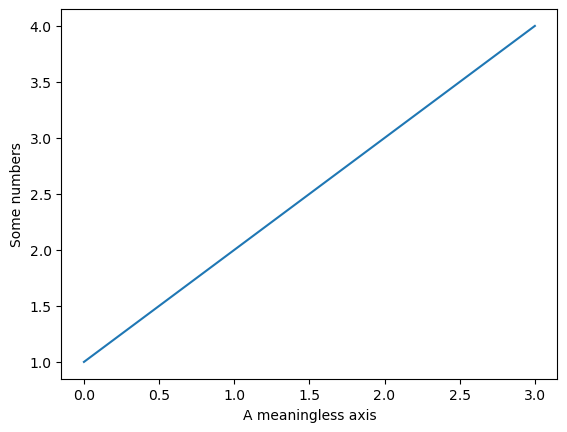

In [2]:
plt.plot([1,2,3,4])
plt.ylabel('Some numbers')
plt.xlabel("A meaningless axis")
plt.show()

However, it is obviously possible to provide data for both the x-axis and y-axis.

Note: When you provide both x-axis and y-axis data, you feed the x-axis data into the **plot()** method first and then feed in the y-axis data second.

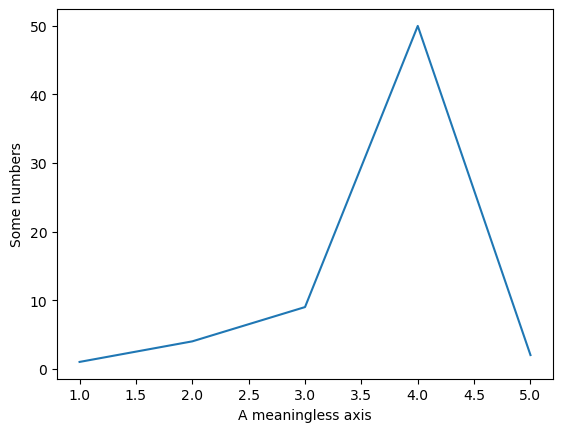

In [3]:
plt.plot([1,2,3,4,5], [1,4,9,50,2])
plt.ylabel('Some numbers')
plt.xlabel("A meaningless axis")
plt.show()

The **plot()** method has an optional third argument that specifies the appearance of the data points.

The default is b-, which is the blue solid line seen in the last two examples. The full list of styles can be found here:
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html 

In the example below, we tell the **.plot()** command to produce a green data point that is a circle. This is what the "go" denotes.

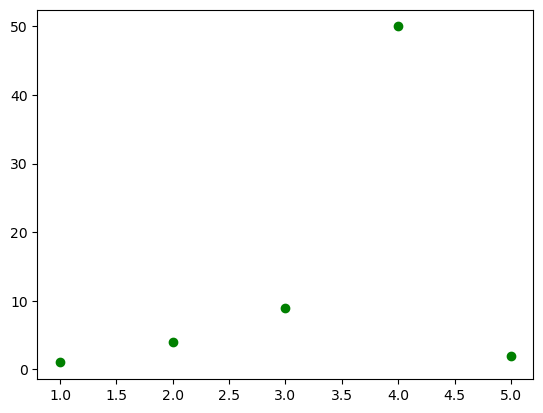

In [4]:
plt.plot([1,2,3,4,5], [1,4,9,50,2], 'go')

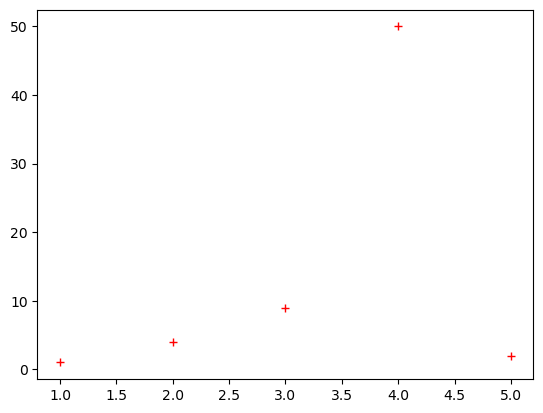

In [5]:
plt.plot([1,2,3,4,5], [1,4,9,50,2], 'r+')

You can quite easily alter the properties of the line with the **plot()** function.

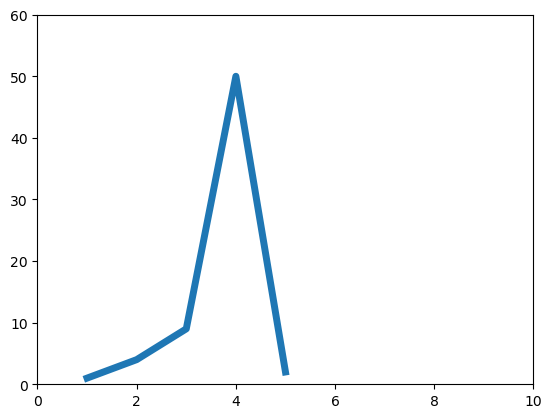

In [6]:
plt.plot([1,2,3,4,5], [1,4,9,50,2], '-', linewidth=5.0)
plt.axis([0,10,0,60])
plt.show()

### Altering tick labels

The **plt.xticks()** and **plt.yticks()** allows you to manually alter the ticks on the x-axis and y-axis respectively.

Note: The tick values have to be contained within a list object.

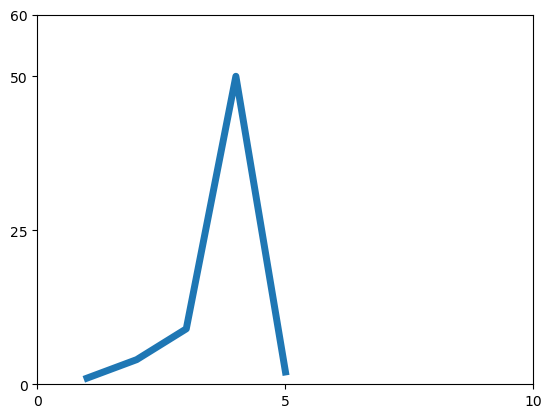

In [7]:
plt.plot([1,2,3,4,5], [1,4,9,50,2], '-', linewidth=5.0)
plt.axis([0,10,0,60])
plt.xticks([0,5,10])
plt.yticks([0,25,50,60])
plt.show()

### The axis() function

The axis() function allows us to specify the range of the axis.

It requires a list that contains the following:

**[The min x-axis value, the max x-axis value, the min y-axis, the max y-axis value]**

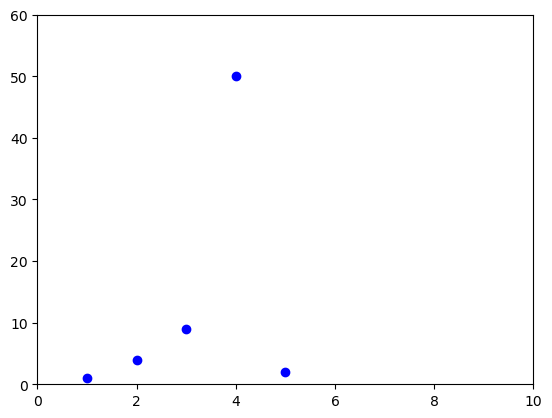

In [8]:
plt.plot([1,2,3,4,5], [1,4,9,50,2], 'bo')
plt.axis([0,10,0,60])
plt.show()

### Matplotlib and NumPy arrays

Normally when working with numerical data, you’ll be using NumPy arrays, which we'll cover in detail later. For the time being, you just need to know that these work really well with Matplotlib. In fact, all sequences are converted into NumPy arrays internally by matplotlib anyway.

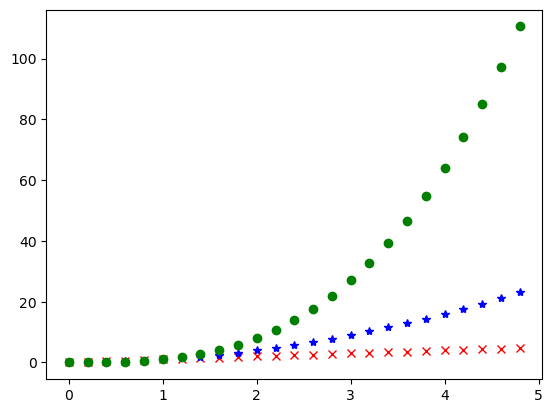

In [4]:
t = np.arange(0., 5., 0.2)
plt.plot(t,t,'rx',t,t**2,'b*', t, t**3, 'go')
plt.show()

### Working with text

There are a number of different ways in which to add text to your graph:

- **title()** = Adds a title to your graph, takes a string as an argument.
- **xlabel()** = Add a title to the x-axis, also takes a string as an argument.
- **ylabel()** = Same as xlabel().
- **text()** = Can be used to add text to an arbitrary location on your graph. Requires the following arguments: text(x-axis location, y-axis location, the string of text to be added)

Note: Matplotlib uses TeX equation expressions. So, as an example, if you wanted to put the $\sigma$ symbol in one of the text blocks, you would write **plt.title(r'$\sigma_i=15$')**.

### Annotating data points

The **.annotate()** method allows you to easily annotate data points or a specific area on a graph.

[None, None, None, None, None, None]

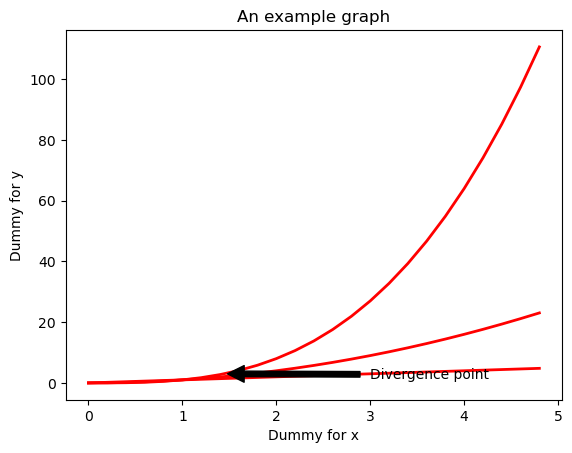

In [13]:
t = np.arange(0., 5., 0.2)
lines = plt.plot(t, t, 'b-', t, t**2, 'r-', t, t**3, 'g-', linewidth=2.0)
plt.xlabel('Dummy for x')
plt.ylabel('Dummy for y')
plt.title('An example graph')
plt.annotate('Divergence point', xy=(1.4,3), xytext=(3,1.5),
            arrowprops=dict(facecolor='black', shrink=0.05,))
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
plt.show()

### Legend

The location of a legend is specified by the **loc** argument. There are a number of in-built locations that can be altered by replacing the number, and full details can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html.

You can then use the **bbox_to_anchor()** argument to manually place the legend, or when used with **loc**, to make slight alterations to the placement.

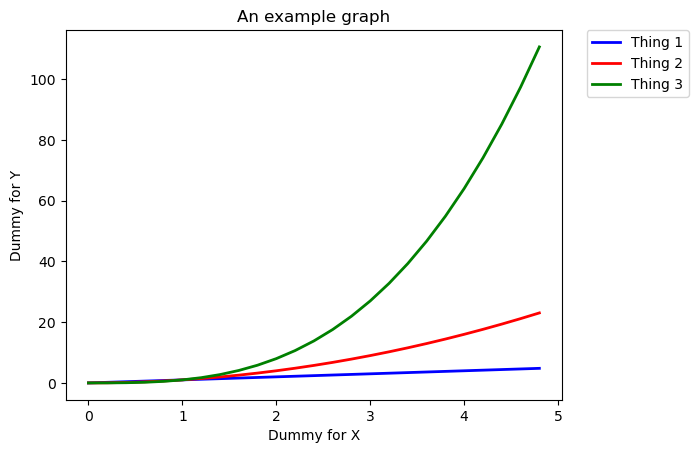

In [19]:
t = np.arange(0., 5., 0.2)
lines = plt.plot(t,t,'b-',linewidth=2.0, label='Thing 1')
lines = plt.plot(t,t**2,'r-',linewidth=2.0, label='Thing 2')
lines = plt.plot(t,t**3,'g-',linewidth=2.0, label='Thing 3')
plt.xlabel('Dummy for X')
plt.ylabel('Dummy for Y')
plt.title('An example graph')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Saving a figure as a file

The **plt.savefig()** method allows you to save your plot as a file.

This function takes a string as an argument, which will be the name of the file. You must remember to state which file type you want the figure saved as; i.e. .png or .jpeg. If you want to save the image file to a folder that is not your current working directory, then you have to include the file path in the file name string, just like we did when we read in files earlier.

Make sure you put the **plt.savefig()** before the **plt.show()** method. Otherwise, the file will be a blank file. 

Also ensure that you include **plt.close()** after saving the file in order to avoid overwriting previously saved files and draining memory resources.